In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import math
import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

### Первая часть

In [3]:
# загружаем датасет
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Посчитать руками статистики $\bar{X}, s^2, \mu, MODE, X_{0.75} - X_{0.25}$ для поля mean symmetry

In [13]:
# your solution is here
mean=sum(df["mean symmetry"])/len(df)
print("Mean= {}".format(mean))
s=(   (df["mean symmetry"]-mean)**2).sum()  /(len(df)-1)
print("S^2 = {}".format(s))
print("Median = {}".format(sorted(df["mean symmetry"])[len(df)//2]))
print("Mode = {}".format(df["mean symmetry"].mode()[0]))
print("X0.75-X0.25 = {}".format(sorted(df["mean symmetry"])[len(df)*3//4]-sorted(df["mean symmetry"])[len(df)//4]))

Mean= 0.181161862917399
S^2 = 0.0007515428211713161
Median = 0.1792
Mode = 0.1601
X0.75-X0.25 = 0.033800000000000024


In [12]:
df["mean symmetry"].describe()

count    569.000000
mean       0.181162
std        0.027414
min        0.106000
25%        0.161900
50%        0.179200
75%        0.195700
max        0.304000
Name: mean symmetry, dtype: float64

#### С помощью seaborn найти пару наиболее зависимых и независимых признаков среди первых 5

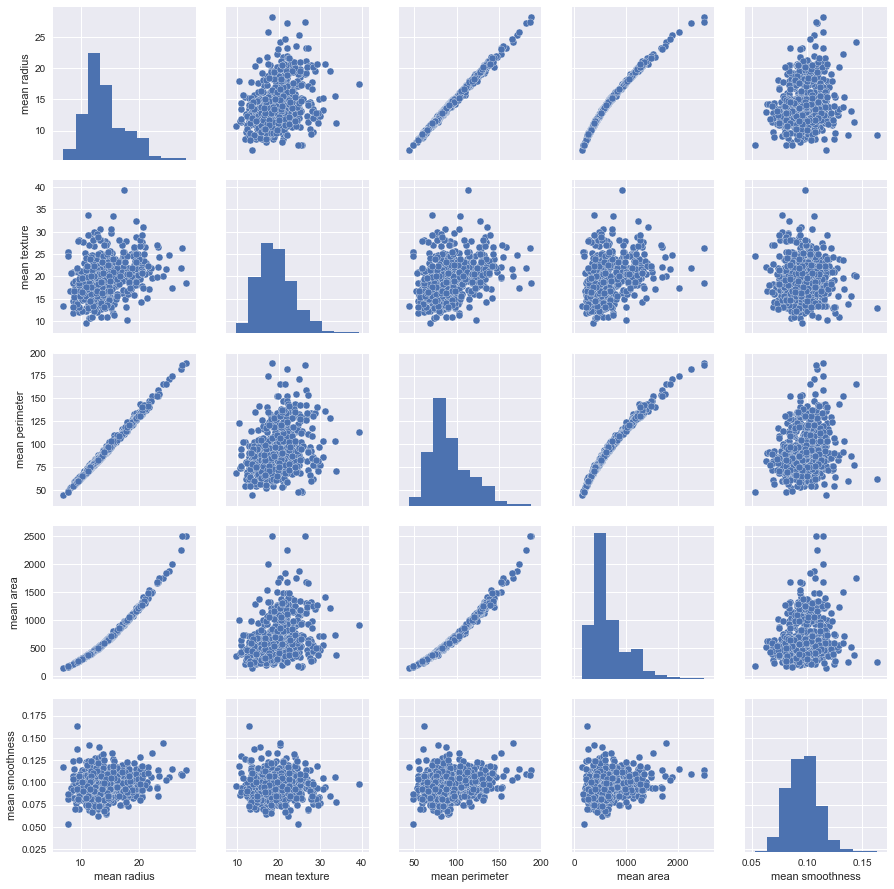

In [91]:
# your solution is here
sns.pairplot(df.iloc[:,:5])

In [ ]:
только по графикам тяжело оценить наиболее зависимые и назависимые признаки

#### С помощью матрицы корреляций найти пару наиболее зависимых и независимых признаков среди первых 5

In [60]:
# your solution is here
correlation_table=df.iloc[:,:5].corr().abs()
correlation_table

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581
mean texture,0.323782,1.000000,0.329533,0.321086,0.023389
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278
mean area,0.987357,0.321086,0.986507,1.000000,0.177028
mean smoothness,0.170581,0.023389,0.207278,0.177028,1.000000


Наиболее зависимые mean perimeter и mean radius, независимые mean smoothness и mean texture

#### Проверить найденные пары t-тестом


Эти пары очень странно проверять t-тестом, их среднее значительно отличается, это абслютно разные показатели

#### Проверить руками гипотезу $H_0: M_{mean\ compactness} = 0$ 

In [54]:
# your solution is here
mean=df["mean compactness"].mean()
std=df["mean compactness"].std()
se=std/math.sqrt(len(df["mean compactness"]))
t=(mean-0)/(se)
p_val=stats.distributions.t.sf(np.abs(t),len(df["mean compactness"])-1)*2
p_val

2.0059202200483517e-198

t-тест отвергает H0 о равенстве среднего значения 0

#### Нарисовать распределение признака worst texture с помощью
- диаграммы
- qq-plot
- эмпирическая ф.р.

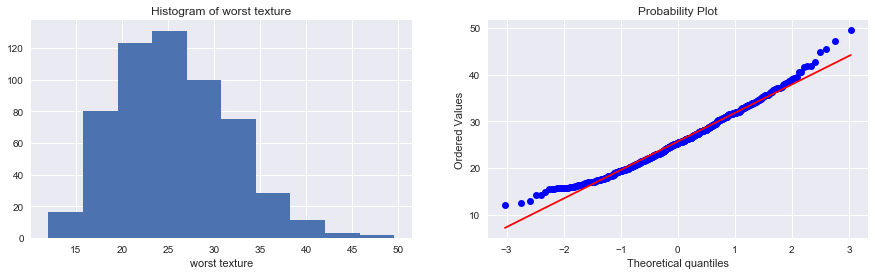

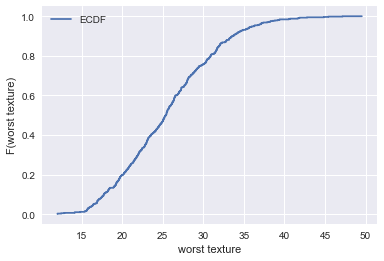

In [102]:
# your solution is here
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(15)
ax1.hist(df["worst texture"])
ax1.set_title("Histogram of worst texture")
ax1.set_xlabel("worst texture")
stats.probplot(df["worst texture"],plot=ax2)
fig, ax3 = plt.subplots(1,1)
ecdf = ECDF(df["worst texture"])
ax3.step(ecdf.x,ecdf.y,label="ECDF")
ax3.legend(["ECDF"])
ax3.set_xlabel("worst texture")
ax3.set_ylabel("F(worst texture)")
plt.show()

### Вторая часть

Сгенерируйте выборку из пуассоновского распределения $Pois(\theta)$ для $\theta = 2$, записав
ее в виде матрицы ${\{X_{ij}\}}_{i=1...N, j=1...K}$ где $N= 1000$ и $K = 10000$.

Выполните следующую процедуру для всех $n=2, ...N$. Для всех $j = 1...K$ по выборке $\{X_{ij}\}_{i=1...n}$ оцените параметр $\theta$ с помощью оценки выборочного среднего $\hat{\theta_j^n}$ и оценки $\tilde{\theta}_j^n = \frac{1}{n-1} \sum_{i=1}^n\left(X_{ij} - \frac1n \sum_{i=1}^n X_{ij}\right)^2$. По выборкам $\{\hat{\theta}_j^n\}_{j=1...K}$ и $\{\tilde{\theta}_j^n\}_{j=1...K}$ для этих двух типов оценок найдите оценки дисперсий $\hat{\sigma}_n$ $\tilde{\sigma}_n$

Нарисуйте график оценок дисперсий в зависимости от $n$. При необходимости не забывайте выставлять значение plt.ylim. Сделайте выводы. **Постарайтесь решить эту задачу без циклов, используя только функции библиотеки numpy**

In [5]:
# your solution is here
n=1000
k=5000
dist=np.array([stats.poisson(2).rvs(n) for j in range(0,k)])
sigma_n_hat=[]
sigma_n_tilda=[]
for j in range(100,n+1):
    matrix=dist[:,:j]
    Thehta_hat=np.mean(matrix,axis=1)
    Thehta_tilda=[sum((matrix[i]-np.mean(matrix[i]))**2)/(len(matrix[i])-1) for i in range(0,k)]
    sigma_n_hat.append(Thehta_hat.var())
    sigma_n_tilda.append(np.array(Thehta_tilda).var())

Text(0,0.5,'$Sigma$')

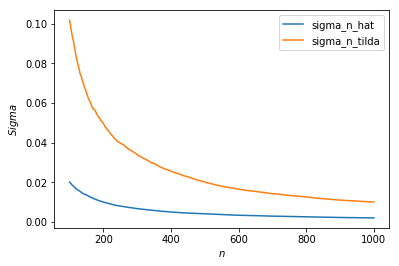

In [6]:
x=range(100,n+1)
plt.plot(x,sigma_n_hat)
plt.plot(x,sigma_n_tilda)
plt.legend(["sigma_n_hat","sigma_n_tilda"])
plt.xlabel("$n$")
plt.ylabel("$Sigma$")

При увеличние числа n, значение  $\tilde{\theta}_j^n$ приближается к $\hat{\theta}_j^n$. Т.к. дисперсия выборочных средних становится меньше